CARGA DE LIBRERIAS

In [1]:
import pandas as pd
import pandas as pd
import sqlite3
import datetime
import numpy as np
import statsmodels.api as sm
from fancyimpute import IterativeImputer
from sklearn.metrics import mean_absolute_error, r2_score
from Herramientas import *
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('once')
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error

/Users/john_fredy_z/Documents/Entornos/env_integrador/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# RECUPERACION O CARGA DE DATOS

La base de datos tiene un tamaño de 17521 filas y 17 columnas


/Users/john_fredy_z/Library/CloudStorage/OneDrive-UniversidadEAFIT/Maestria_Ciencia_de_Datos_Analitica/Proyecto_Int/Proyecto_int_2/Herramientas.py:160: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


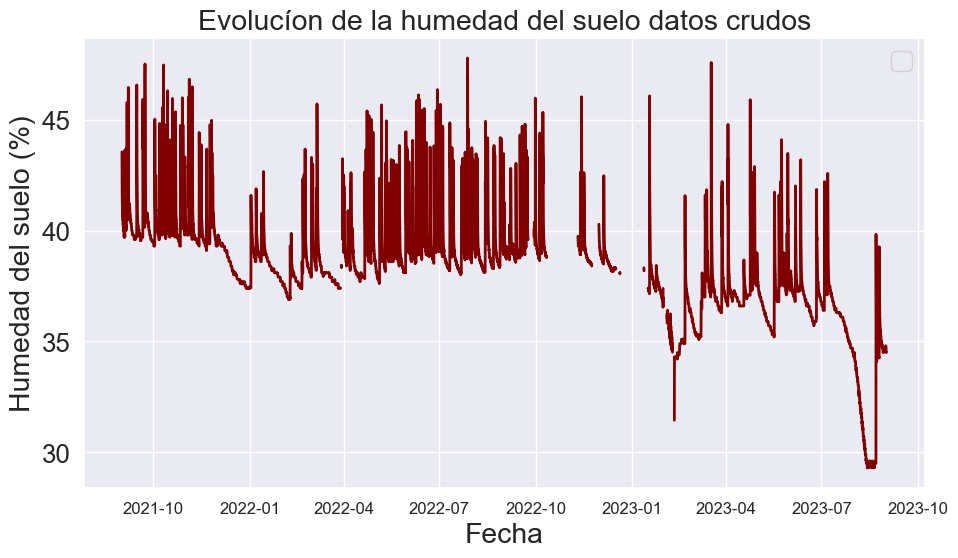

In [2]:
df = preprocesamiento.recuperar()
df["fecha_hora"] = pd.to_datetime(df["fecha_hora"])
titulo = 'Evolucíon de la humedad del suelo datos crudos'
color= 'maroon'
linea = 2
formato_fecha= ''
eda.plot_time_series(df,titulo,color,linea,formato_fecha)


# PREPROCESAMIENTO

Las variables imputadas fueron:  ['precipitacion', 'presion', 'temperatura', 'humedad', 'Velocidad_Prom', 'Velocidad_Max', 'Direccion_Prom', 'Direccion_Max', 'radiacion', 'humedad_suelo']


/Users/john_fredy_z/Library/CloudStorage/OneDrive-UniversidadEAFIT/Maestria_Ciencia_de_Datos_Analitica/Proyecto_Int/Proyecto_int_2/Herramientas.py:160: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


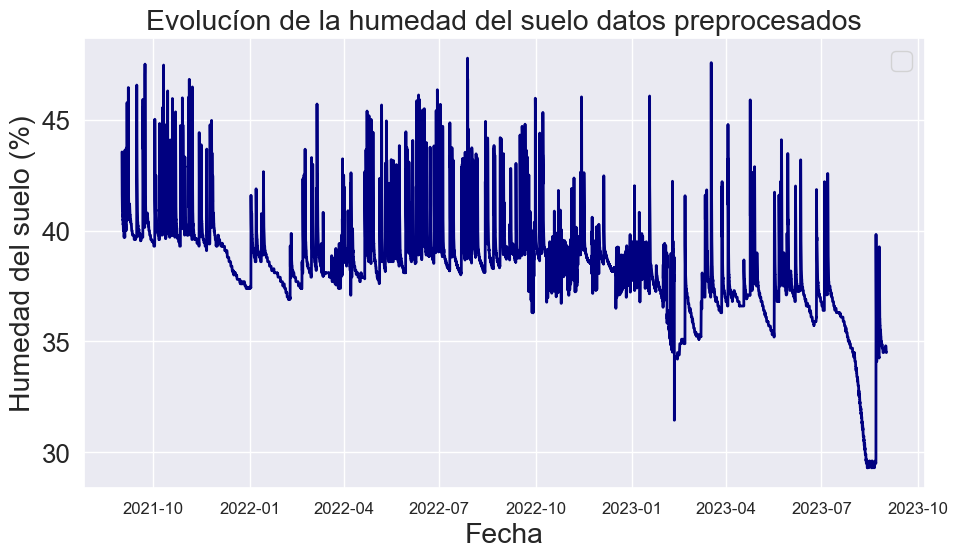

In [3]:
data = preprocesamiento.preprocesamiento_df(df)
df["fecha_hora"] = pd.to_datetime(df["fecha_hora"])
titulo = 'Evolucíon de la humedad del suelo datos preprocesados'
color= 'navy'
linea = 2
formato_fecha= ''
eda.plot_time_series(df,titulo,color,linea,formato_fecha)

In [4]:
data = preprocesamiento.index_datetime(data)


/Users/john_fredy_z/Library/CloudStorage/OneDrive-UniversidadEAFIT/Maestria_Ciencia_de_Datos_Analitica/Proyecto_Int/Proyecto_int_2/Herramientas.py:64: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data = data.asfreq('H')


# EDA

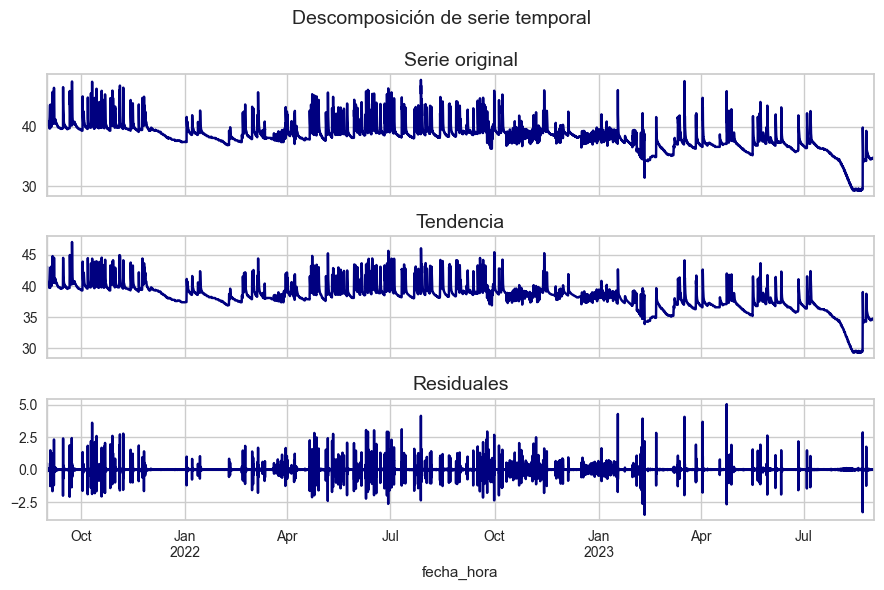

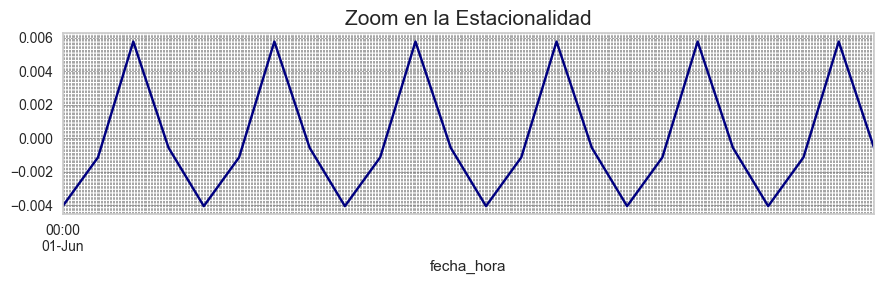

In [ ]:
eda.descomposicion(df=data)


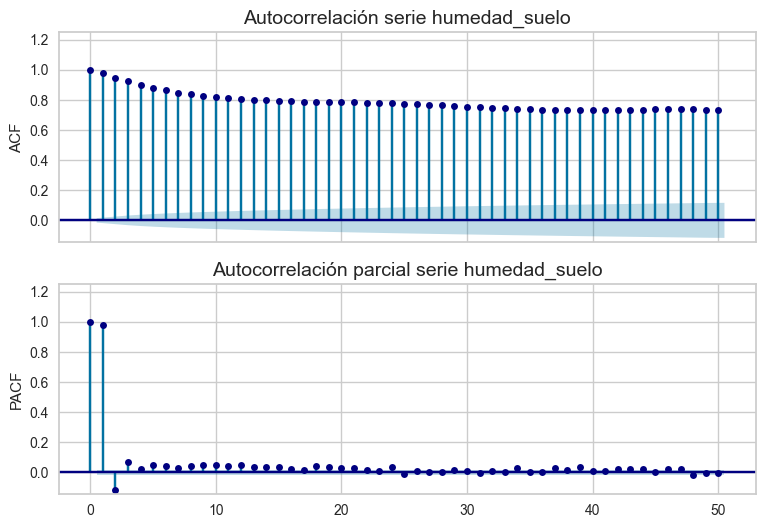

In [7]:
eda.acf_pacf(data)

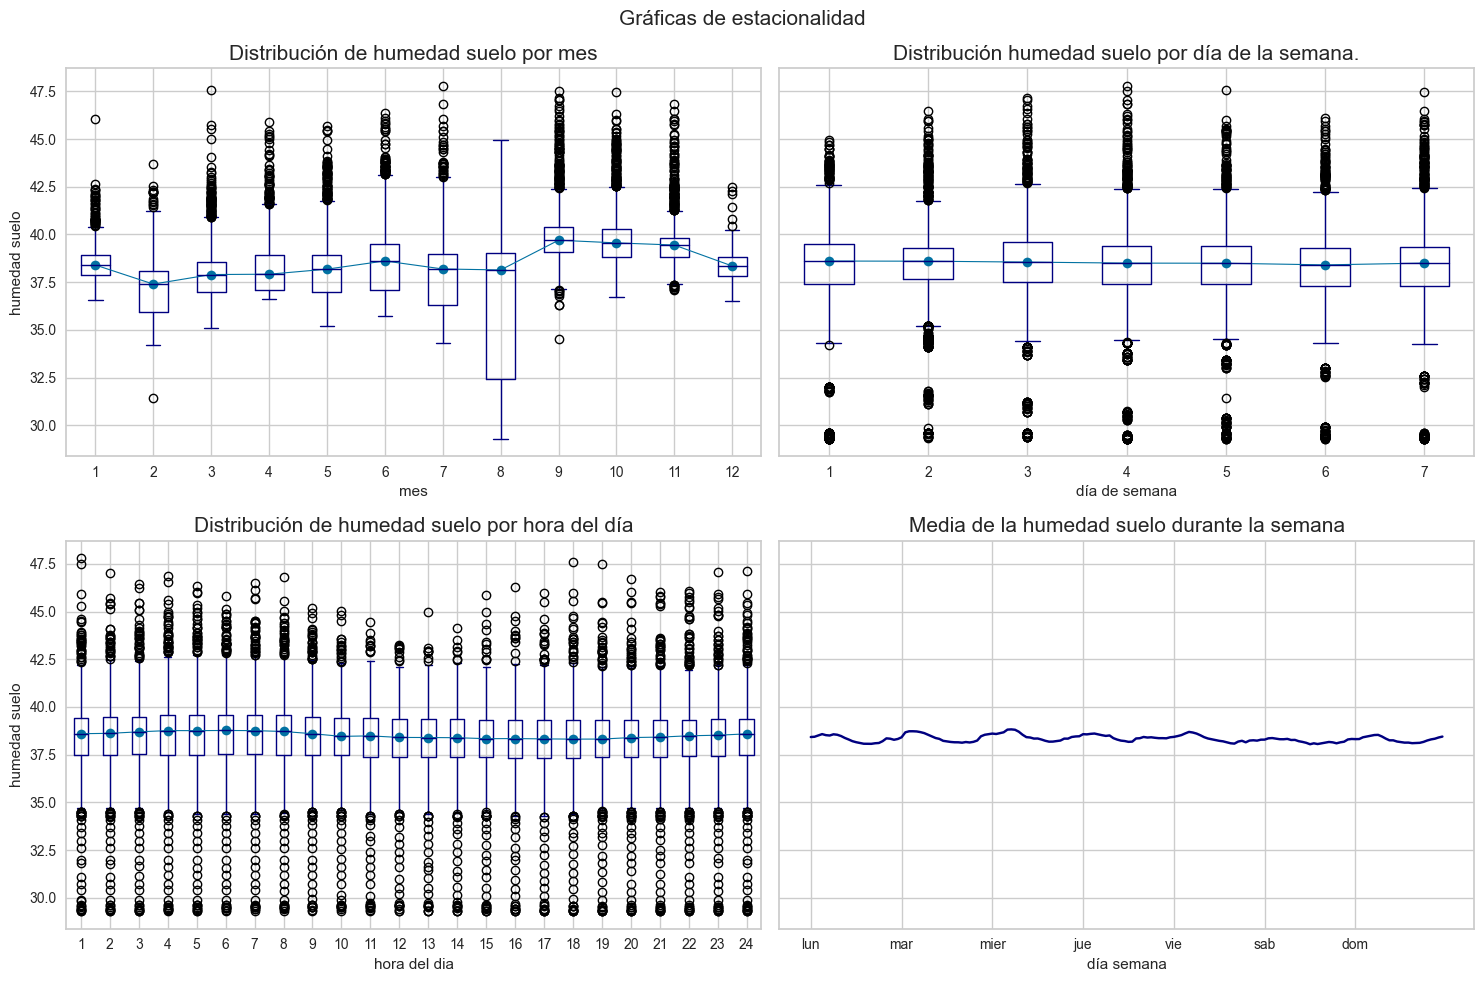

In [6]:
eda.graf_estacional(data)

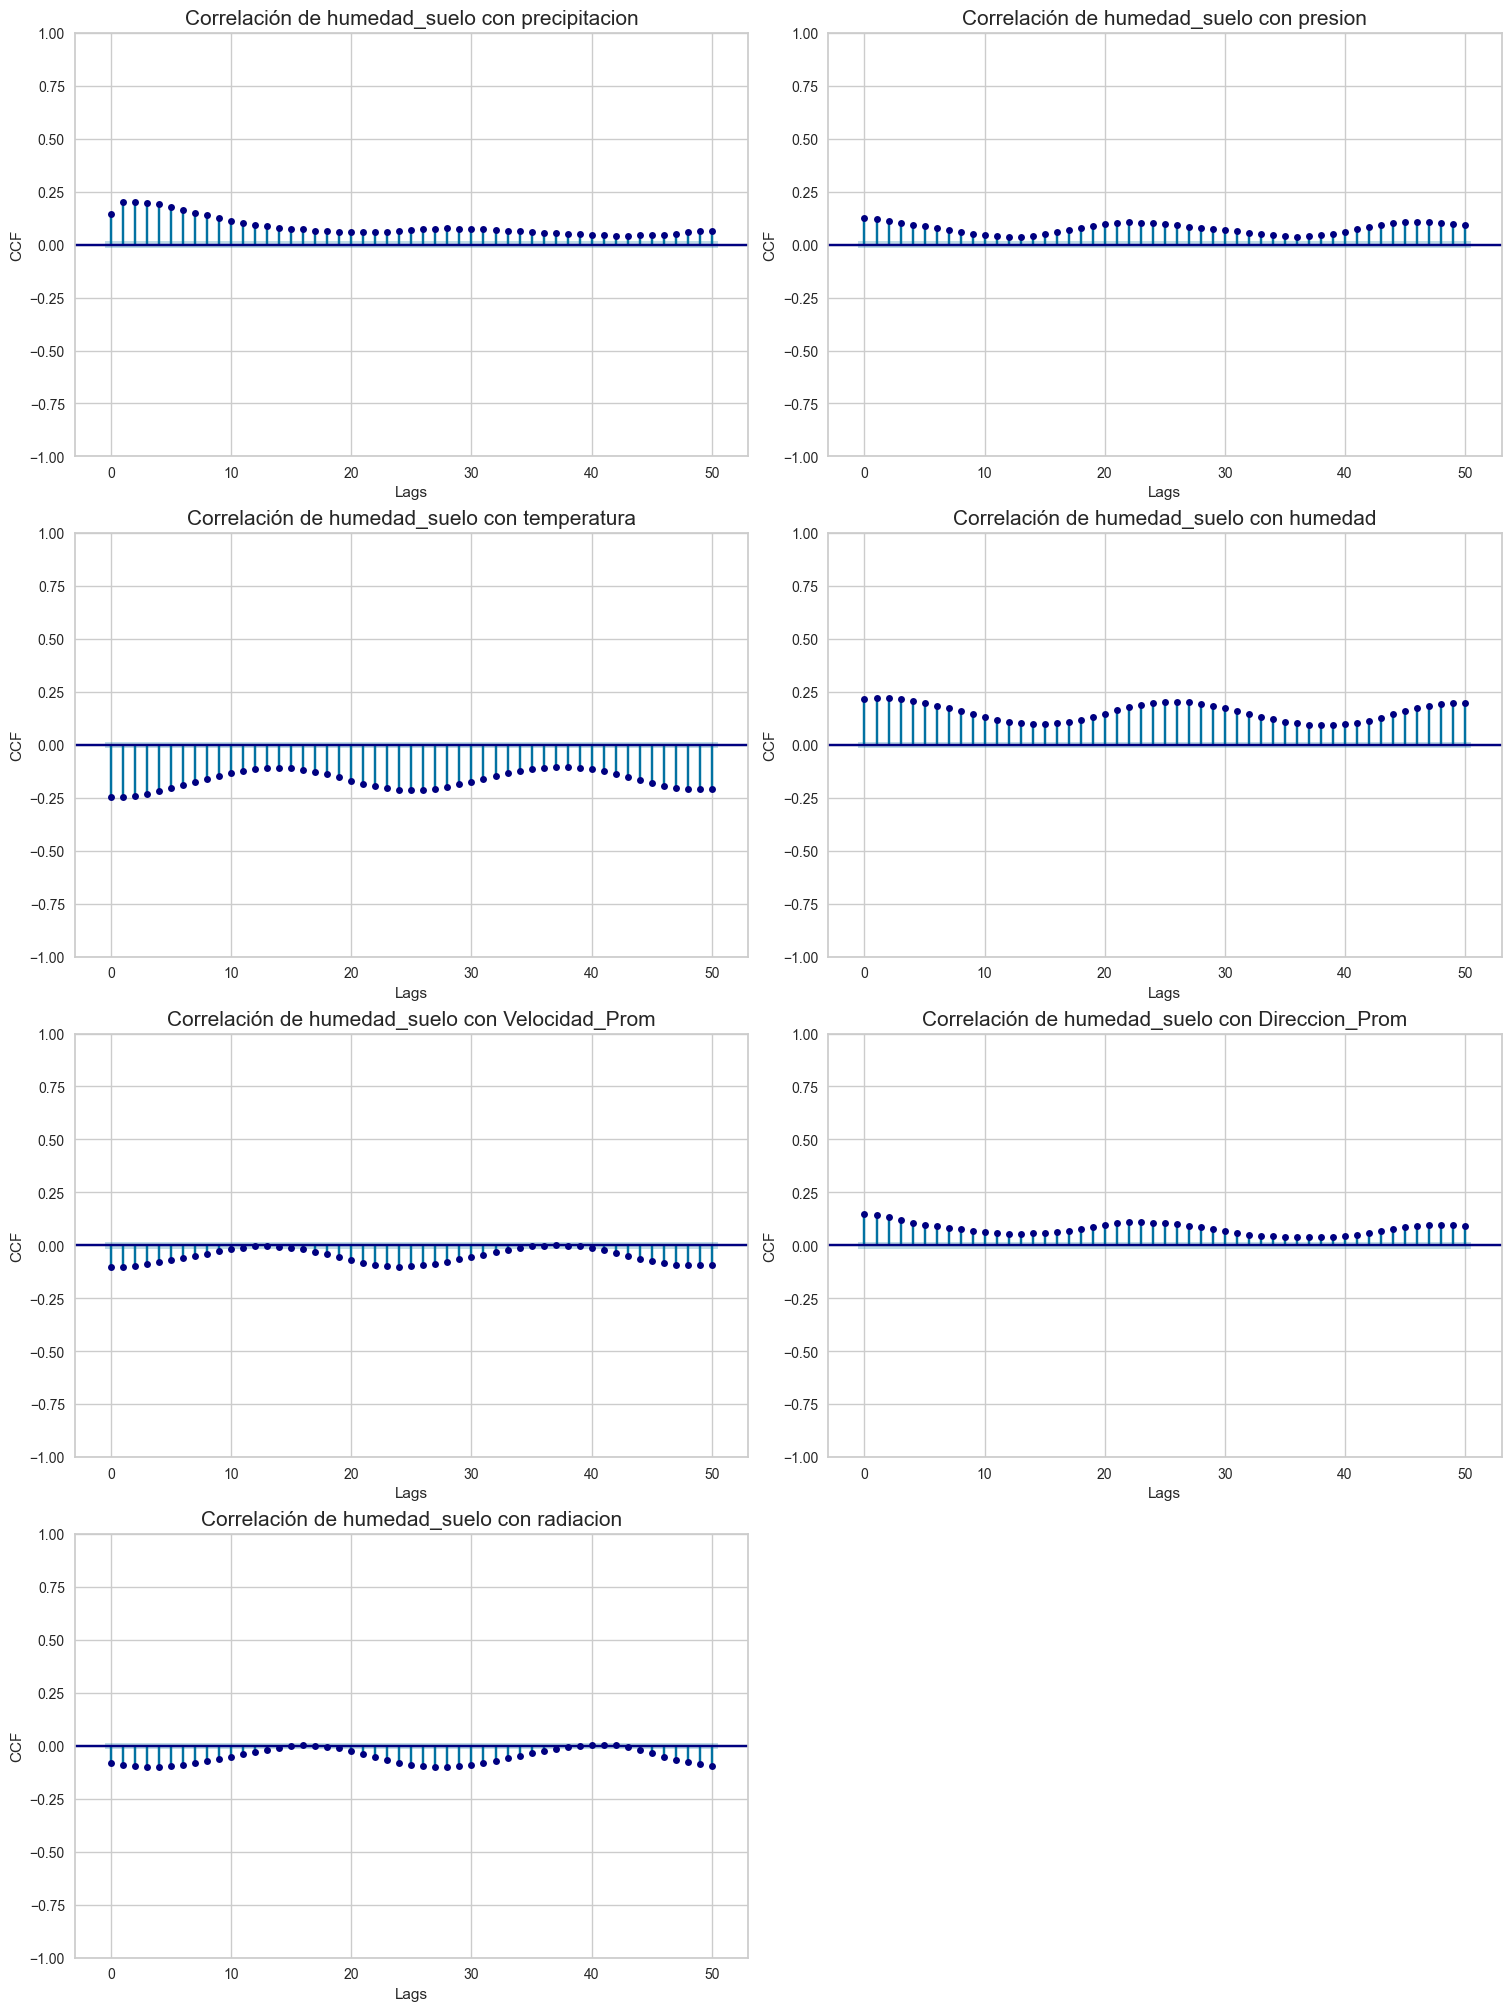

In [11]:
variable_objetivo = 'humedad_suelo'
variables = ['precipitacion', 'presion', 'temperatura', 'humedad','Velocidad_Prom', 'Direccion_Prom', 'radiacion']
eda.plot_cross_correlation_subplots(data, variable_objetivo, variables, lags=50)

# MODELADO

## Modelo univariado

### SARIMA

In [8]:
metrica_sarima, prediccion_sarima = modelado.modelo_sarima(data, s_order=3)

/Users/john_fredy_z/Library/CloudStorage/OneDrive-UniversidadEAFIT/Maestria_Ciencia_de_Datos_Analitica/Proyecto_Int/Proyecto_int_2/Herramientas.py:58: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data = data.asfreq('H')
/Users/john_fredy_z/Library/CloudStorage/OneDrive-UniversidadEAFIT/Maestria_Ciencia_de_Datos_Analitica/Proyecto_Int/Proyecto_int_2/Herramientas.py:58: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data = data.asfreq('H')
/Users/john_fredy_z/Library/CloudStorage/OneDrive-UniversidadEAFIT/Maestria_Ciencia_de_Datos_Analitica/Proyecto_Int/Proyecto_int_2/Herramientas.py:58: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data = data.asfreq('H')
/Users/john_fredy_z/Documents/Entornos/env_integrador/lib/python3.10/site-packages/skforecast/model_selection/_validation.py:1071: LongTrainingWarning: The forecaster will be 

/Users/john_fredy_z/Library/CloudStorage/OneDrive-UniversidadEAFIT/Maestria_Ciencia_de_Datos_Analitica/Proyecto_Int/Proyecto_int_2/Herramientas.py:58: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  
/Users/john_fredy_z/Library/CloudStorage/OneDrive-UniversidadEAFIT/Maestria_Ciencia_de_Datos_Analitica/Proyecto_Int/Proyecto_int_2/Herramientas.py:58: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  
/Users/john_fredy_z/Library/CloudStorage/OneDrive-UniversidadEAFIT/Maestria_Ciencia_de_Datos_Analitica/Proyecto_Int/Proyecto_int_2/Herramientas.py:58: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  


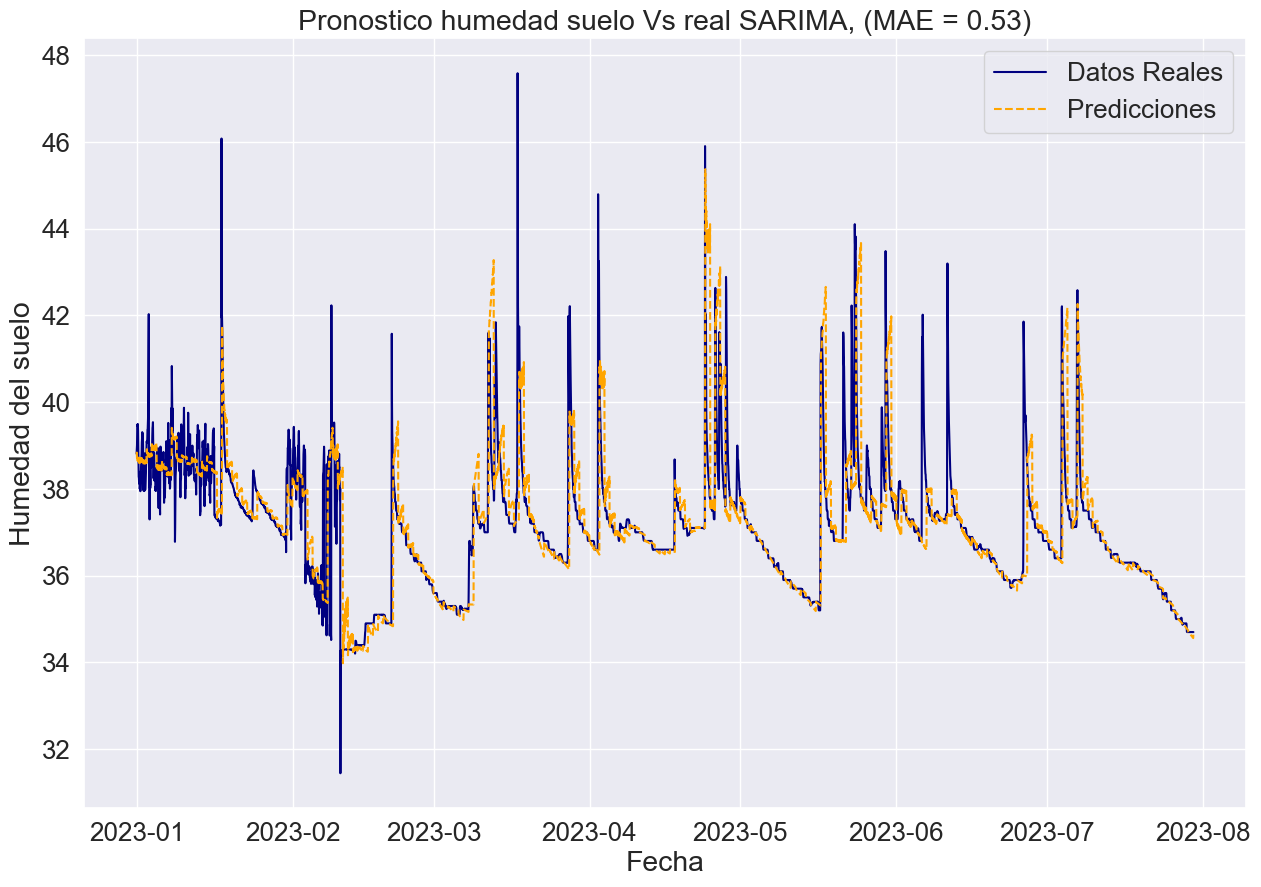

In [ ]:

evaluacion.plot_univariados(data,prediccion =prediccion_sarima ,metrica = metrica_sarima.values[0][0],tipo_modelo='SARIMA')

### LGBM

#### Busqueda de hiperparametros

In [55]:
search_LGBM, forecaster_LGBM_uni = modelado.tunning_lightgbm(data)

Best trial: 7. Best value: 1.14145: 100%|██████████| 10/10 [00:11<00:00,  1.17s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3] 
  Parameters: {'n_estimators': 450, 'max_depth': 9, 'min_data_in_leaf': 195, 'learning_rate': 0.03135981726152987, 'feature_fraction': 0.6, 'max_bin': 125, 'reg_alpha': 0.7000000000000001, 'reg_lambda': 1.0}
  Backtesting metric: 1.1414469549188615


In [56]:
metrica_LGBM_uniq, predictions_LGBM_uniq = modelado.model_lightgbm(data, forecaster_LGBM_uni)

/Users/john_fredy_z/Library/CloudStorage/OneDrive-UniversidadEAFIT/Maestria_Ciencia_de_Datos_Analitica/Proyecto_Int/Proyecto_int_2/Herramientas.py:64: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data = data.asfreq('H')
/Users/john_fredy_z/Library/CloudStorage/OneDrive-UniversidadEAFIT/Maestria_Ciencia_de_Datos_Analitica/Proyecto_Int/Proyecto_int_2/Herramientas.py:64: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data = data.asfreq('H')
/Users/john_fredy_z/Library/CloudStorage/OneDrive-UniversidadEAFIT/Maestria_Ciencia_de_Datos_Analitica/Proyecto_Int/Proyecto_int_2/Herramientas.py:64: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data = data.asfreq('H')
/Users/john_fredy_z/Documents/Entornos/env_integrador/lib/python3.10/site-packages/skforecast/model_selection/_validation.py:185: LongTrainingWarning: The forecaster will be f

/Users/john_fredy_z/Library/CloudStorage/OneDrive-UniversidadEAFIT/Maestria_Ciencia_de_Datos_Analitica/Proyecto_Int/Proyecto_int_2/Herramientas.py:64: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data = data.asfreq('H')
/Users/john_fredy_z/Library/CloudStorage/OneDrive-UniversidadEAFIT/Maestria_Ciencia_de_Datos_Analitica/Proyecto_Int/Proyecto_int_2/Herramientas.py:64: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data = data.asfreq('H')
/Users/john_fredy_z/Library/CloudStorage/OneDrive-UniversidadEAFIT/Maestria_Ciencia_de_Datos_Analitica/Proyecto_Int/Proyecto_int_2/Herramientas.py:64: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data = data.asfreq('H')


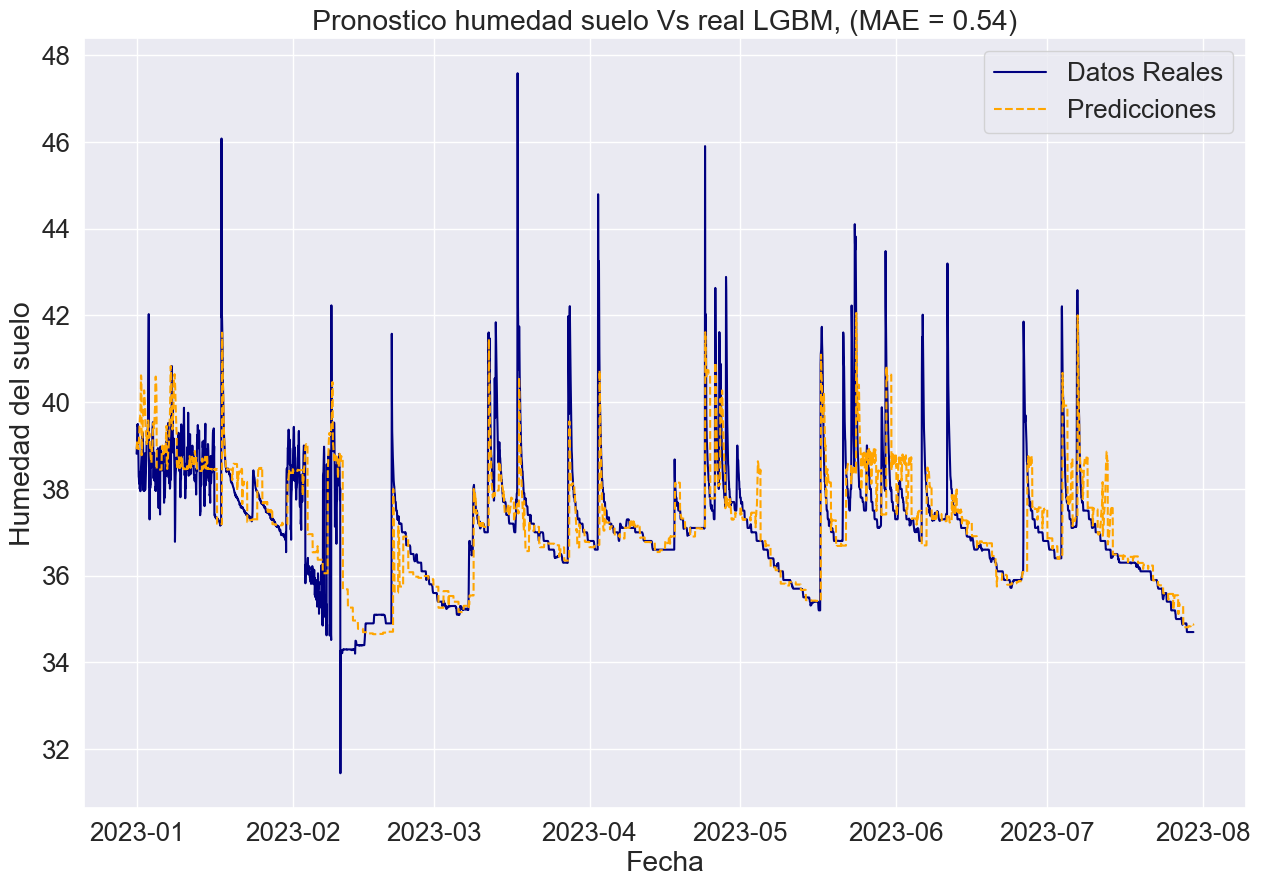

In [58]:

evaluacion.plot_univariados(data,prediccion =predictions_LGBM_uniq ,metrica = metrica_LGBM_uniq.values[0][0],tipo_modelo='LGBM')

## Modelo con variables exogenas

### SARIMAX 

In [ ]:

combinacion = {
    "combinación_1": ["temperatura", "humedad"],
    "combinación_2": ["temperatura", "humedad", "precipitacion"],
    "combinación_3": ["temperatura", "humedad", "radiacion", "precipitacion"],
    "combinación_4": ["precipitacion", "humedad"],
}

result = pd.DataFrame()

for n, e in combinacion.items():
    df_temp = modelado.modelo_sarimax(data=data, exogenas=e, numero_combinacion=n)
    result = pd.concat([result, df_temp], ignore_index=True)

# Mostrar el DataFrame resultante
print(result)


/Users/john_fredy_z/Library/CloudStorage/OneDrive-UniversidadEAFIT/Maestria_Ciencia_de_Datos_Analitica/Proyecto_Int/Proyecto_int_2/Herramientas.py:64: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data = data.asfreq('H')
/Users/john_fredy_z/Library/CloudStorage/OneDrive-UniversidadEAFIT/Maestria_Ciencia_de_Datos_Analitica/Proyecto_Int/Proyecto_int_2/Herramientas.py:64: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data = data.asfreq('H')
/Users/john_fredy_z/Library/CloudStorage/OneDrive-UniversidadEAFIT/Maestria_Ciencia_de_Datos_Analitica/Proyecto_Int/Proyecto_int_2/Herramientas.py:64: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data = data.asfreq('H')
/Users/john_fredy_z/Documents/Entornos/env_integrador/lib/python3.10/site-packages/skforecast/model_selection/_validation.py:1071: LongTrainingWarning: The forecaster will be 

### LGBM con variables exógena

In [ ]:
params = {
    'n_estimators': 450, 
    'max_depth': 9, 
    'min_data_in_leaf': 195, 
    'learning_rate': 0.03135981726152987, 
    'feature_fraction': 0.6, 
    'max_bin': 125, 
    'reg_alpha': 0.7000000000000001, 
    'reg_lambda': 1.0,
    'random_state': 15926,
    'verbose': -1
    }

combinacion = {
    "combinación_1": ["temperatura", "humedad"],
    "combinacion_2": ["temperatura", "humedad", "precipitacion"],
    "combinación_3": ["temperatura", "humedad", "radiacion", "precipitacion"],
    "combinación_4": ["precipitacion", "humedad"],

}

# DataFrame para almacenar resultados
result_LGBM_exog = pd.DataFrame()

# Iterar sobre las combinaciones
for n, e in combinacion.items():
    df_temp = modelado.model_lightgbm_exog(data=df, exogenas=e, num_comb=n)
    result_LGBM_exog = pd.concat([result_LGBM_exog, df_temp], ignore_index=True)

# Mostrar el DataFrame resultante
print(result_LGBM_exog)



# EVALUACIÓN

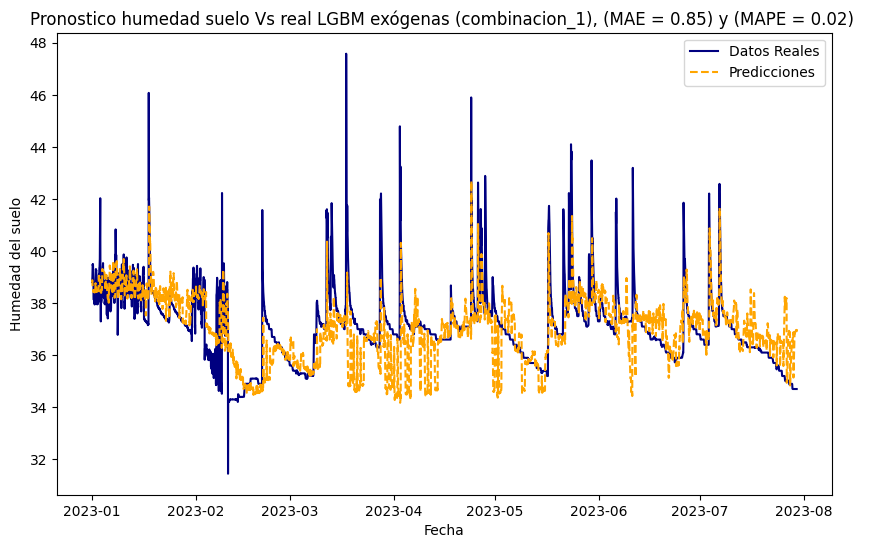

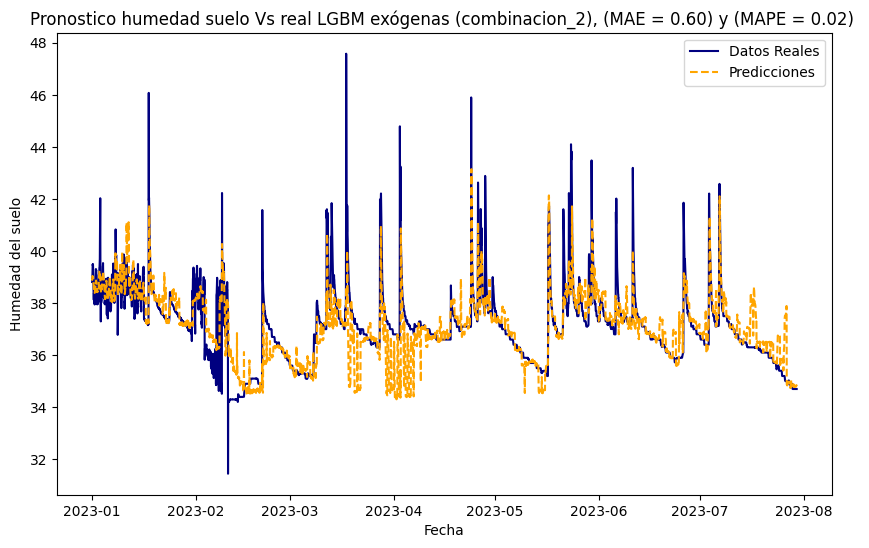

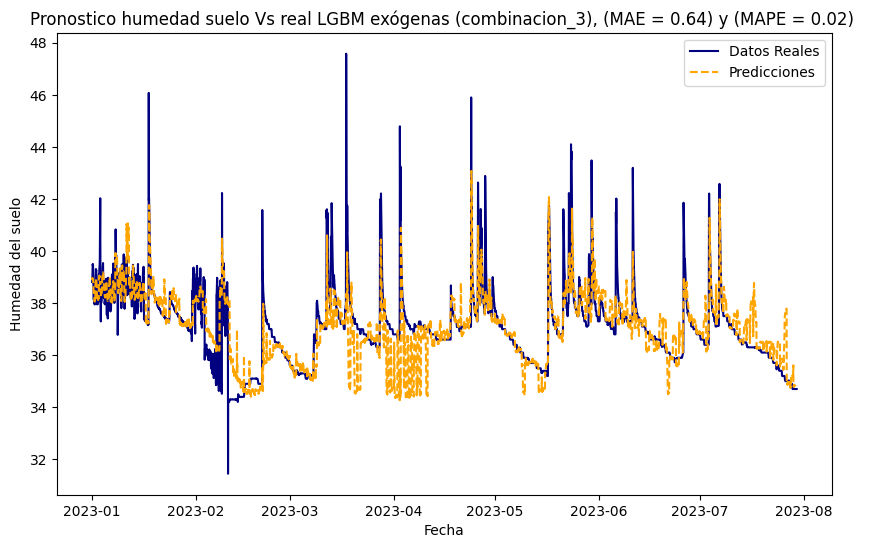

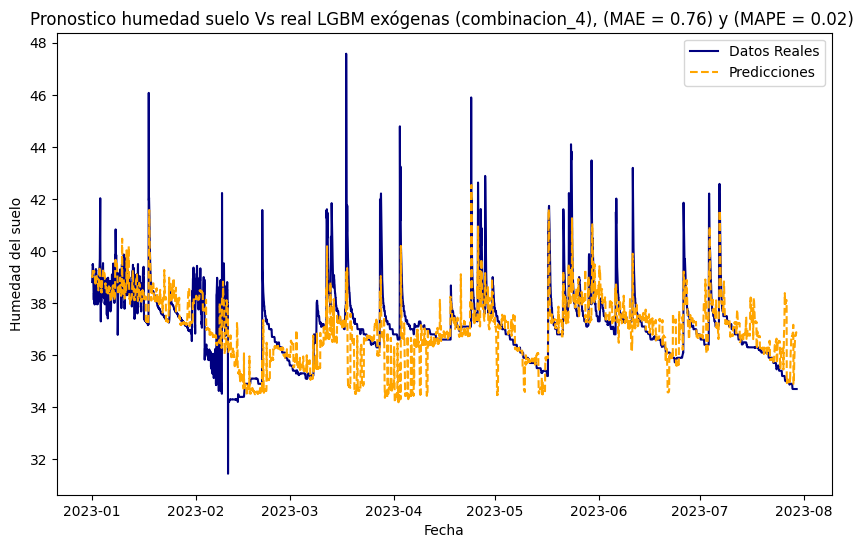

In [ ]:
tipo_modelo = "LGBM exógenas"
evaluacion.plot_real_predit(result_LGBM_exog, tipo_modelo)

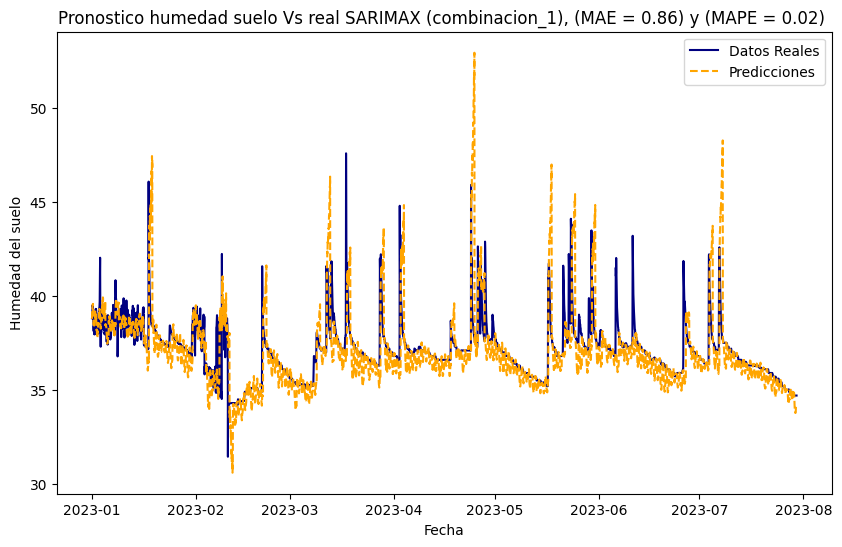

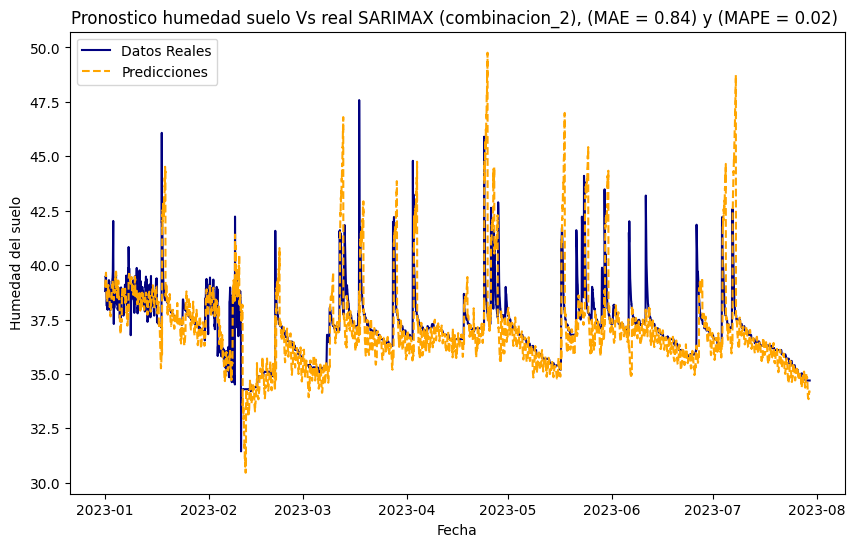

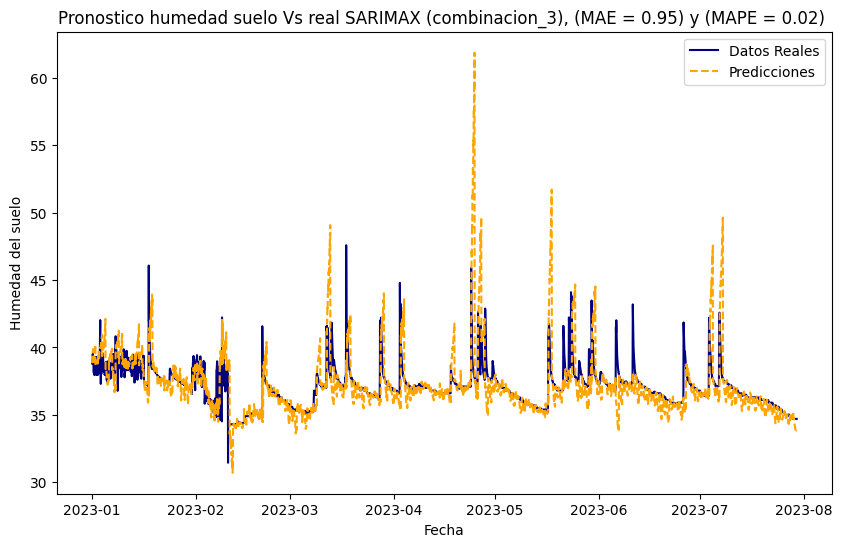

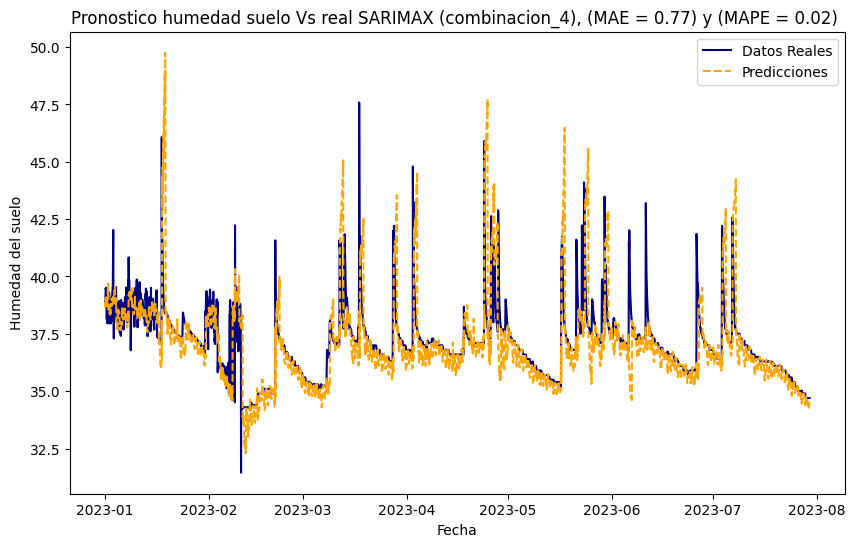

In [ ]:
tipo_modelo = "SARIMAX exógenas"
evaluacion.plot_real_predit(result, tipo_modelo)

In [3]:
df_sarima3 = pd.read_csv('version_3011/predicciones_sarima_3.csv', sep=',')
df_test= pd.read_csv('version_3011/test.csv', sep=',')
df_sarima24 = pd.read_csv('version_3011/predicciones_sarima_24.csv', sep=',')
df_lgbm=pd.read_csv('version_3011/predictions_LGBM_uni.csv',sep=',')

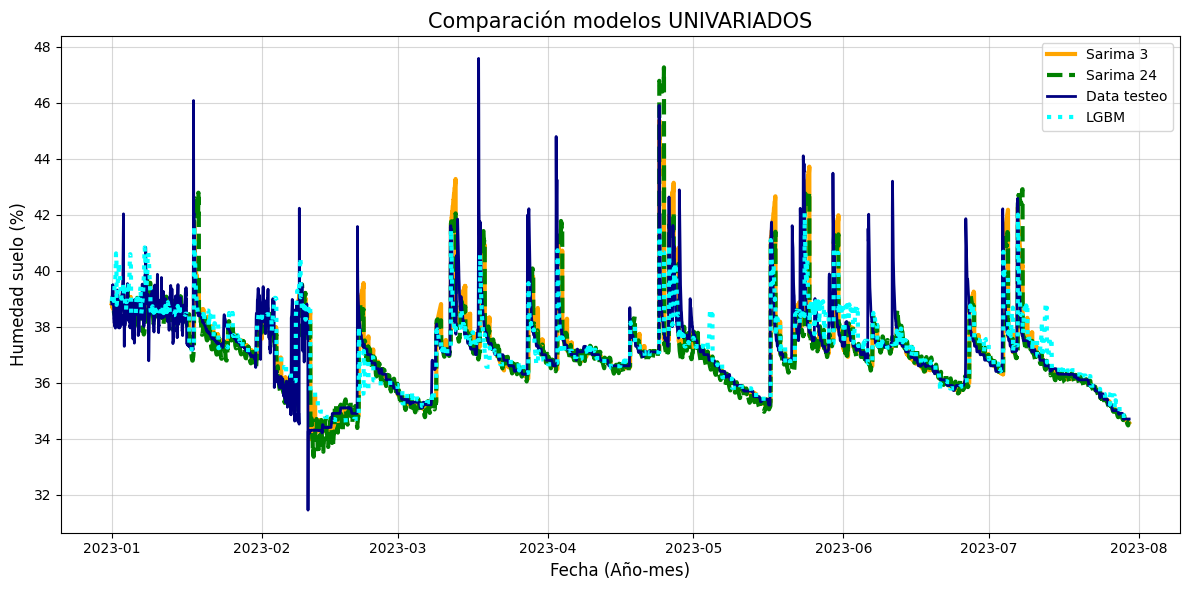

In [ ]:
evaluacion.plot_inivariado(df_sarima3,df_test,df_sarima24,df_lgbm)